In [1]:
import geopandas 
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeat
import numpy as np
from svgpath2mpl import parse_path
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
%matplotlib inline

In [2]:
track_line_gdf = geopandas.read_file('example_shp/al052019_5day_037/al052019-037_5day_lin.shp')
cone_gdf       = geopandas.read_file('example_shp/al052019_5day_037/al052019-037_5day_pgn.shp')
points_gdf     = geopandas.read_file('example_shp/al052019_5day_037/al052019-037_5day_pts.shp')
ww_gdf         = geopandas.read_file('example_shp/al052019_5day_037/al052019-037_ww_wwlin.shp')


In [3]:
track_line_gdf

,STORMNAME,STORMTYPE,ADVDATE,ADVISNUM,STORMNUM,FCSTPRD,BASIN,geometry
0,Dorian,HU,1100 AM EDT Mon Sep 02 2019,37,5.0,120.0,AL,"LINESTRING (-78.30000 26.80000, -78.70000 26.9..."


In [5]:
map_crs = ccrs.LambertConformal(central_latitude=35, central_longitude=-100)
data_crs   = ccrs.PlateCarree()

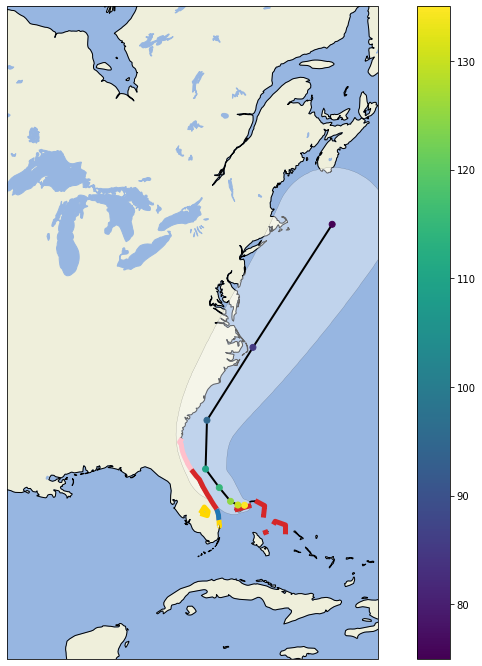

In [8]:
fig = plt.figure(figsize=(14, 12))
ax = plt.subplot(1, 1, 1, projection = map_crs)
ax.set_extent([-90, -72, 20, 55])

ax.add_feature(cfeat.COASTLINE)
#ax.add_feature(cfeat.STATES)
ax.add_feature(cfeat.LAND)
ax.add_feature(cfeat.OCEAN)
ax.add_feature(cfeat.LAKES)
#ax.add_feature(cfeat.OCEAN.with_scale('50m'))

ax.add_geometries(cone_gdf['geometry'], crs=data_crs, facecolor='white',
                 edgecolor='black', linewidth=0.25, alpha=0.4)
ax.add_geometries(track_line_gdf['geometry'], crs=data_crs, facecolor='none',
                 edgecolor='black', linewidth=2)
sc = ax.scatter(points_gdf['LON'], points_gdf['LAT'],transform=data_crs,
                 zorder=10, c=points_gdf['MAXWIND'])

ww_colors = {'TWA': 'gold',
             'HWA': 'pink',
             'TWR': 'tab:blue',
             'HWR': 'tab:red'}
for ww_type in ww_colors.keys():
    ww_subset = ww_gdf[ww_gdf['TCWW']==ww_type]
    ax.add_geometries(ww_subset['geometry'], facecolor='none',
                     edgecolor=ww_colors[ww_type], crs=data_crs,
                     linewidth=5)
plt.colorbar(sc)



In [2]:
hurricane = parse_path('''M 1272,389 C 1272,259 1221,158 1120,87 1018,16 875,-20 690,-20 347,-20 148,99 93,
338 L 278,375 C 299,290 345,228 414,189 483,149 578,129 697,129 820,129 916,150 983,193 1050,235 1083,
297 1083,379 1083,425 1073,462 1052,491 1031,520 1001,543 963,562 925,581 880,596 827,609 774,622 716,
635 652,650 541,675 456,699 399,724 341,749 295,776 262,807 229,837 203,872 186,913 168,954 159,1000 159,
1053 159,1174 205,1267 298,1332 390,1397 522,1430 694,1430 854,1430 976,1406 1061,1357 1146,1308 1205,
1224 1239,1106 L 1051,1073 C 1030,1148 991,1202 933,1236 875,1269 795,1286 692,1286 579,1286 493,1267 434,
1230 375,1193 345,1137 345,1063 345,1020 357,984 380,956 403,927 436,903 479,884 522,864 609,840 738,811 781,
801 825,791 868,781 911,770 952,758 991,744 1030,729 1067,712 1102,693 1136,674 1166,650 1191,622 1216,59
4 1236,561 1251,523 1265,485 1272,440 1272,389 Z''')

In [7]:
hurricane.vertices = hurricane.vertices.mean(axis=0)


In [8]:
fig = plt.figure(figsize=(14, 12))
ax = plt.subplot(1, 1, 1, projection = map_crs)
ax.set_extent([-100, -75, 15, 30])

ax.add_feature(cfeat.COASTLINE)
#ax.add_feature(cfeat.STATES)
ax.add_feature(cfeat.LAND)
ax.add_feature(cfeat.OCEAN)
ax.add_feature(cfeat.LAKES)
#ax.add_feature(cfeat.OCEAN.with_scale('50m'))

lats = [20, 22]
lons = [-80, -85]

ax.plot(lons, lats, marker=hurricane, transform=ccrs.PlateCarree(),
         markersize=40, color='red', linestyle=None)


ValueError: Invalid vertices array

<Figure size 1008x864 with 1 Axes>

/home/jmedinah/miniconda3/envs/unidata/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:387: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  return matplotlib.axes.Axes.draw(self, renderer=renderer,


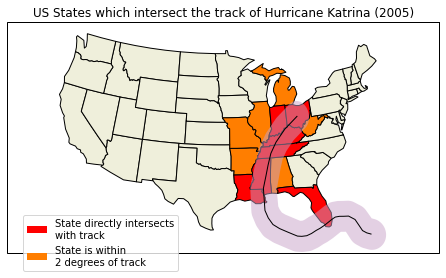

In [1]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import shapely.geometry as sgeom

import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader


def sample_data():
    """
    Return a list of latitudes and a list of longitudes (lons, lats)
    for Hurricane Katrina (2005).

    The data was originally sourced from the HURDAT2 dataset from AOML/NOAA:
    https://www.aoml.noaa.gov/hrd/hurdat/newhurdat-all.html on 14th Dec 2012.

    """
    lons = [-75.1, -75.7, -76.2, -76.5, -76.9, -77.7, -78.4, -79.0,
            -79.6, -80.1, -80.3, -81.3, -82.0, -82.6, -83.3, -84.0,
            -84.7, -85.3, -85.9, -86.7, -87.7, -88.6, -89.2, -89.6,
            -89.6, -89.6, -89.6, -89.6, -89.1, -88.6, -88.0, -87.0,
            -85.3, -82.9]

    lats = [23.1, 23.4, 23.8, 24.5, 25.4, 26.0, 26.1, 26.2, 26.2, 26.0,
            25.9, 25.4, 25.1, 24.9, 24.6, 24.4, 24.4, 24.5, 24.8, 25.2,
            25.7, 26.3, 27.2, 28.2, 29.3, 29.5, 30.2, 31.1, 32.6, 34.1,
            35.6, 37.0, 38.6, 40.1]

    return lons, lats


def main():
    fig = plt.figure()
    # to get the effect of having just the states without a map "background"
    # turn off the background patch and axes frame
    ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.LambertConformal(),
                      frameon=False)
    ax.patch.set_visible(False)

    ax.set_extent([-125, -66.5, 20, 50], ccrs.Geodetic())

    shapename = 'admin_1_states_provinces_lakes'
    states_shp = shpreader.natural_earth(resolution='110m',
                                         category='cultural', name=shapename)

    lons, lats = sample_data()

    ax.set_title('US States which intersect the track of '
                 'Hurricane Katrina (2005)')

    # turn the lons and lats into a shapely LineString
    track = sgeom.LineString(zip(lons, lats))

    # buffer the linestring by two degrees (note: this is a non-physical
    # distance)
    track_buffer = track.buffer(2)

    def colorize_state(geometry):
        facecolor = (0.9375, 0.9375, 0.859375)
        if geometry.intersects(track):
            facecolor = 'red'
        elif geometry.intersects(track_buffer):
            facecolor = '#FF7E00'
        return {'facecolor': facecolor, 'edgecolor': 'black'}

    ax.add_geometries(
        shpreader.Reader(states_shp).geometries(),
        ccrs.PlateCarree(),
        styler=colorize_state)

    ax.add_geometries([track_buffer], ccrs.PlateCarree(),
                      facecolor='#C8A2C8', alpha=0.5)
    ax.add_geometries([track], ccrs.PlateCarree(),
                      facecolor='none', edgecolor='k')

    # make two proxy artists to add to a legend
    direct_hit = mpatches.Rectangle((0, 0), 1, 1, facecolor="red")
    within_2_deg = mpatches.Rectangle((0, 0), 1, 1, facecolor="#FF7E00")
    labels = ['State directly intersects\nwith track',
              'State is within \n2 degrees of track']
    ax.legend([direct_hit, within_2_deg], labels,
              loc='lower left', bbox_to_anchor=(0.025, -0.1), fancybox=True)

    plt.show()


if __name__ == '__main__':
    main()

In [ ]:
'''
align_string.py

Align string with spaces between words to fit specified width

Author: Denis Barmenkov <denis.barmenkov@gmail.com>

Copyright: this code is free, but if you want to use it, 
           please keep this multiline comment along with function source. 
           Thank you.

2005-05-22 13:27 - first revision
2010-03-09 17:01 - added align_paragraph()
2010-03-09 17:56 - added check for paragraph's last line
'''
import re, textwrap

__author__ = 'Denis Barmenkov <denis.barmenkov@gmail.com>'
__source__ = 'http://code.activestate.com/recipes/414870/'

def items_len(l):
    return sum([ len(x) for x in l] )

lead_re = re.compile(r'(^\s+)(.*)$')

def align_string(s, width, last_paragraph_line=0):
    '''
    align string to specified width 
    '''
    # detect and save leading whitespace
    m = lead_re.match(s) 
    if m is None:
        left, right, w = '', s, width
    else:
        left, right, w = m.group(1), m.group(2), width - len(m.group(1))

    items = right.split()

    # add required space to each words, exclude last item
    for i in range(len(items) - 1):
        items[i] += ' '

    if not last_paragraph_line:
        # number of spaces to add
        left_count = w - items_len(items)
        while left_count > 0 and len(items) > 1:
            for i in range(len(items) - 1):
                items[i] += ' '
                left_count -= 1
                if left_count < 1:  
                    break

    res = left + ''.join(items)
    return res

def align_paragraph(paragraph, width, debug=0):
    '''
    align paragraph to specified width,
    returns list of paragraph lines
    '''
    lines = list()
    if type(paragraph) == type(lines):
        lines.extend(paragraph)
    elif type(paragraph) == type(''):
        lines.append(paragraph)
    elif type(paragraph) == type(tuple()):
        lines.extend(list(paragraph))
    else:
        raise TypeError, 'Unsopported paragraph type: %r' % type(paragraph)

    flatten_para = ' '.join(lines)

    splitted = textwrap.wrap(flatten_para, width) 
    if debug:
        print 'textwrap:\n%s\n' % '\n'.join(splitted)

    wrapped = list()
    while len(splitted) > 0:
        line = splitted.pop(0)
        if len(splitted) == 0:
            last_paragraph_line = 1
        else:
            last_paragraph_line = 0
        aligned = align_string(line, width, last_paragraph_line)
        wrapped.append(aligned)

    if debug:
        print 'textwrap & align_string:\n%s\n' % '\n'.join(wrapped)

    return wrapped


if __name__ == '__main__':
    s = 'Contributors whose recipes are used in the book will receive a complimentary copy of the Second Edition. A portion of all royalties will go to the non-profit Python Software Foundation. [Last words]'
    align_paragraph(s, width=30, debug=1)

    '''
    =====================
    Script output:
    =====================

    textwrap:
    Contributors whose recipes are
    used in the book will receive
    a complimentary copy of the
    Second Edition. A portion of
    all royalties will go to the
    non-profit Python Software
    Foundation. [Last words]

    textwrap & align_string:
    Contributors whose recipes are
    used  in the book will receive
    a  complimentary  copy  of the
    Second  Edition.  A portion of
    all  royalties  will go to the
    non-profit   Python   Software
    Foundation. [Last words]
    '''